<a href="https://colab.research.google.com/github/Demesmaeker/DL-wine-quality/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


# Exploring & Reshaping the datas

## Load the dataset

In [3]:
df = pd.read_csv("wine.csv")
df.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5798,red,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8,5
400,white,6.3,0.20,0.40,1.5,0.037,35.0,107.0,0.99170,3.46,0.50,11.4,6
379,white,6.4,0.31,0.28,1.5,0.037,12.0,119.0,0.99190,3.32,0.51,10.4,7
4236,white,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.2,5
1790,white,9.4,0.16,0.30,1.4,0.042,26.0,176.0,0.99540,3.15,0.46,9.1,5
4165,white,6.6,0.22,0.35,1.4,0.050,23.0,83.0,0.99019,3.17,0.48,12.0,7
1794,white,6.6,0.37,0.24,2.0,0.064,23.0,120.0,0.99460,3.32,0.54,9.4,5
409,white,8.2,0.28,0.42,1.8,0.031,30.0,93.0,0.99170,3.09,0.39,11.4,5
3018,white,6.8,0.22,0.31,6.9,0.037,33.0,121.0,0.99176,3.02,0.39,11.9,8
2368,white,7.4,0.34,0.30,14.9,0.037,70.0,169.0,0.99698,3.25,0.37,10.4,6


In [4]:
print(df["type"].value_counts())
print(df["quality"].value_counts())


df.isnull().sum()

white    4898
red      1599
Name: type, dtype: int64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
print(df["type"].value_counts())
print(df["quality"].value_counts())

white    4870
red      1593
Name: type, dtype: int64
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64


## Get Dummies

In [7]:
wines = pd.get_dummies(df, columns=['type'])
wines.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
2838,6.9,0.15,0.29,2.3,0.033,14.0,82.0,0.99132,3.10,0.58,11.2,7,0,1
1587,6.4,0.25,0.74,7.8,0.045,52.0,209.0,0.99560,3.21,0.42,9.2,6,0,1
5192,13.3,0.34,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6,1,0
6174,8.5,0.40,0.40,6.3,0.050,3.0,10.0,0.99566,3.28,0.56,12.0,4,1,0
6243,8.2,0.44,0.24,2.3,0.063,10.0,28.0,0.99613,3.25,0.53,10.2,6,1,0
2808,7.0,0.27,0.48,6.1,0.042,60.0,184.0,0.99566,3.20,0.50,9.4,6,0,1
906,8.3,0.27,0.45,1.3,0.048,8.0,72.0,0.99440,3.08,0.61,10.3,4,0,1
4112,6.0,0.20,0.25,2.0,0.041,30.0,95.0,0.99078,3.27,0.56,11.1,6,0,1
2398,8.0,0.36,0.39,1.6,0.024,26.0,93.0,0.99116,3.15,0.49,11.9,6,0,1
3144,6.2,0.23,0.36,17.2,0.039,37.0,130.0,0.99946,3.23,0.43,8.8,6,0,1


## Split the dataset

In [8]:
x = wines.iloc[:,:-3].join(wines['type_red'].to_frame()
                    ).join(wines['type_white'].to_frame()).to_numpy()

y = wines.iloc[:,-3].astype('int32').to_numpy()
y = [(round(each / 10)) for each in y]

y = np.reshape(y, (6463, 1))

print(x.shape)
print(y.shape)

(6463, 13)
(6463, 1)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5170, 13)
(1293, 13)
(5170, 1)
(1293, 1)


# Building the Neural Network

## Create the Model

In [11]:
model = Sequential()

## Add the layers

In [12]:
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Flatten())
model.add(Dense(42, activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compiling the Model

In [13]:
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

# Training

In [14]:
history = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
162/162 [==============================] - 1s 1ms/step - loss: 0.3417 - accuracy: 0.6259
Epoch 2/150
162/162 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.6219
Epoch 3/150
162/162 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.6263
Epoch 4/150
162/162 [==============================] - 0s 1ms/step - loss: 0.2681 - accuracy: 0.6314
Epoch 5/150
162/162 [==============================] - 0s 1ms/step - loss: 0.2191 - accuracy: 0.6669
Epoch 6/150
162/162 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.6743
Epoch 7/150
162/162 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.6747
Epoch 8/150
162/162 [==============================] - 0s 1ms/step - loss: 0.1930 - accuracy: 0.7022
Epoch 9/150
162/162 [==============================] - 0s 1ms/step - loss: 0.1999 - accuracy: 0.6822
Epoch 10/150
162/162 [==============================] - 0s 1ms/step - loss: 0.2014 - accura

# Evaluation

In [15]:
scores = model.evaluate(X_test, y_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

41/41 [==============================] - 0s 972us/step - loss: 0.1558 - accuracy: 0.7695

accuracy: 76.95%


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 42)                2730      
_________________________________________________________________
flatten_1 (Flatten)          (None, 42)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                688       
_________________________________________________________________
flatten_2 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

## Plots

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


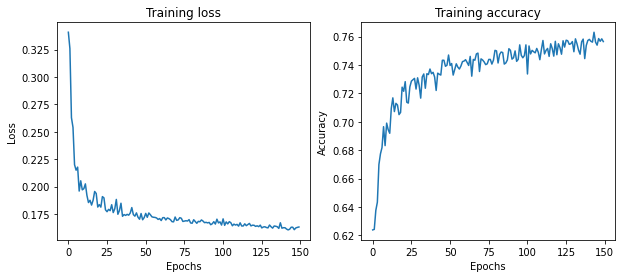

In [18]:
loss = history.history['loss']
accuracy = history.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()